Introduction

以下要使用 sklearn 中的一個資料集 - breast_cancer，用來示範邏輯斯回歸模型的使用，該資料集用不同的照片轉數據的特徵來判斷該病患是否罹患乳癌（良性：benign（1），惡性：malignant (0)），該分析的資料屬於 Binary Classification。

In [3]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

1. 載入資料集

In [21]:
breast_cancer = datasets.load_breast_cancer()

In [23]:
print(breast_cancer.data.shape) #data 是 NumPy 陣列(numpy.ndarray)，裡面包含 569 筆樣本資料，每筆資料有 30 個特徵。

(569, 30)


In [31]:
x = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)
y = pd.DataFrame(breast_cancer.target, columns = ['target'])
data = pd.concat([x, y], axis = 1)

這段程式碼的目的是 將乳腺癌數據集 (breast_cancer) 轉換成 pandas 的 DataFrame 格式，並將特徵 (x) 和標籤 (y) 合併成一個完整的數據集 (data)

In [33]:
print(x.head()) #x 變成結構化的表格，每一列是一個病人，每一欄是一個特徵（例如 mean radius、mean texture）　

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

In [35]:
print(y.head())  # y 則成了一個單獨的標籤 DataFrame，每一列對應 x 中的病人

   target
0       0
1       0
2       0
3       0
4       0


In [37]:
print(data.head())  #現在data這個DataFrame包含所有的數據，標籤也併入其中

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [39]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [43]:
data.isnull().sum()  #檢查遺漏值

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

2. 資料預處理

為了避免後續的預測及避免模型 underfitting/overfitting，先將資料切分成訓練集與測試集。另一方面，為了不使資料維度大小影響預測結果，也將資料進行標準化

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

test_size=0.2	20% 當測試集，80% 當訓練集(常見比例)
random_state=42	設定隨機種子，確保拆分結果一致

In [50]:
print(f"x_train shape: {x_train.shape}")  # (455, 30) -> 455 筆訓練數據，30 個特徵
print(f"x_test shape: {x_test.shape}")   # (114, 30) -> 114 筆測試數據，30 個特徵
print(f"y_train shape: {y_train.shape}") # (455, 1) -> 455 個訓練標籤
print(f"y_test shape: {y_test.shape}")   # (114, 1) -> 114 個測試標籤

# 569 筆數據 拆分成 455 筆訓練 + 114 筆測試（因為 569 * 0.8 ≈ 455）

x_train shape: (455, 30)
x_test shape: (114, 30)
y_train shape: (455, 1)
y_test shape: (114, 1)


In [56]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_std = scaler.transform(x_train)
x_test_std = scaler.transform(x_test)

此段目的是對數據進行標準化 (Standardization)，使所有特徵擁有相同的尺度 (scale)，這在機器學習中特別重要，因為某些演算法（如邏輯斯回歸、SVM、KNN 等）對不同尺度的數據敏感。

3. 建置模型

In [58]:
from sklearn.linear_model import LogisticRegression

Logistic Regression 會預測 某個類別的機率，並根據這個機率進行分類。如果機率大於 0.5，我們分類為 1，否則分類為 0。

scikit-learn 提供三種正則化方式：
l1 (Lasso Regression)
l2 (Ridge Regression)
elasticnet (L1 + L2 的混合)

In [64]:
clf = LogisticRegression(penalty='l2').fit(x_train_std, y_train.values.ravel())

選擇 L2 是為了讓所有特徵的影響力更均勻分布，避免某些特徵的權重過大。
fit(X, y) 方法：則是讓模型學習 X（特徵） 和 y（標籤）之間的關係，並計算最佳的迴歸係數 (weights)。
y_train.values.ravel()	則將 y_train 轉換為 1D 陣列（只有一排的數據），才不影響數據運行。

In [66]:
predict = clf.predict(x_test_std)
clf.predict_proba(x_test_std)[:10]

array([[1.13590250e-01, 8.86409750e-01],
       [9.99990991e-01, 9.00936206e-06],
       [9.96920905e-01, 3.07909541e-03],
       [5.10134225e-04, 9.99489866e-01],
       [6.06389713e-05, 9.99939361e-01],
       [1.00000000e+00, 9.48087773e-11],
       [9.99999998e-01, 1.53672648e-09],
       [9.65096937e-01, 3.49030633e-02],
       [3.79342140e-01, 6.20657860e-01],
       [7.59402734e-04, 9.99240597e-01]])

如果右側數值 (P(y=1)) 比左側數值 (P(y=0)) 大，則預測 1（良性腫瘤）。
如果左側數值 (P(y=0)) 比右側數值 (P(y=1)) 大，則預測 0（惡性腫瘤）。

In [69]:
coef = clf.coef_[0]
for i in range(len(data.columns[:-1])):
    print(data.columns[i],":",coef[i])

mean radius : -0.43190367777433786
mean texture : -0.38732553114139195
mean perimeter : -0.39343247642496076
mean area : -0.4652100607636062
mean smoothness : -0.07166727707542167
mean compactness : 0.5401639468319589
mean concavity : -0.8014580988560315
mean concave points : -1.119804075650287
mean symmetry : 0.23611851556028704
mean fractal dimension : 0.07592092813647368
radius error : -1.2681781455073842
texture error : 0.1888773801099112
perimeter error : -0.6105830174385625
area error : -0.9071857032866867
smoothness error : -0.3133067534877975
compactness error : 0.6824914543472079
concavity error : 0.17527451713672207
concave points error : -0.3112998998152244
symmetry error : 0.5004250240524786
fractal dimension error : 0.6162299296594599
worst radius : -0.8798402352507746
worst texture : -1.3506055922623328
worst perimeter : -0.5894527319656216
worst area : -0.8418459407075642
worst smoothness : -0.544169669829603
worst compactness : 0.01611019428995047
worst concavity : -0.9

上述主要在列出每個特徵（變數）的迴歸係數 (coefficient, coef_)，用來觀察 Logistic Regression 模型對每個特徵的權重。

可以根據模型的結果來試著思考：
因為 Logistic Regression 的輸出來自線性加權和


如果 coef_ 絕對值大：
代表這個特徵的數值變化，對 z（決策值）影響很大。
如果 coef_ 絕對值小：
代表這個特徵的數值變化，對 z 影響較小。

如果將係數取絕對值，絕對值越大，代表影響力越深
若從絕對值大小來看的話，可以發現模型中比較重要的係數：

worst fractal dimension
worst texture
radius error
重要係數關係到:
這個特徵是否能夠有效分開良性與惡性腫瘤。
這個特徵是否能夠補充其他特徵無法提供的信息。

4. 模型評估

同時不能只看 coef_ 來判斷模型的好壞，還需要使用「評估指標」來衡量分類器的表現。這些評估指標包括：

Confusion Matrix (混淆矩陣) → 檢查預測錯多少
Accuracy (準確率) → 看模型整體預測對多少
Recall (召回率, 靈敏度) → 針對 重要類別（例如惡性腫瘤）預測得如何
F1-score (F1 分數) → 綜合 Precision（精確率）和 Recall 的指標，適合不平衡數據

這些指標可以幫助回答：
「這個模型真的可以準確區分良性與惡性腫瘤嗎？還是它只是隨機猜測？」

In [87]:
from sklearn.metrics import confusion_matrix, classification_report  #自動計算 模型在測試數據上的準確率
print("Accuracy score:",clf.score(x_test_std, y_test)) 
matric = confusion_matrix(y_test,predict)  #計算出 真正確分類 (TP, TN) 和 錯誤分類 (FP, FN) 的數據。

Accuracy score: 0.9736842105263158


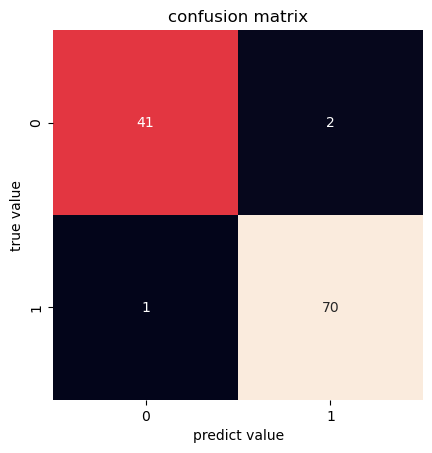

In [97]:
import matplotlib.pyplot as plt

sns.heatmap(matric,square=True,annot=True,cbar=False)
plt.xlabel("predict value")
plt.ylabel("true value")
plt.title("confusion matrix")
plt.show()


In [99]:
print("report:\n", classification_report(y_test, predict, labels=[1,0], target_names=["良性","惡性"]))

report:
               precision    recall  f1-score   support

          良性       0.97      0.99      0.98        71
          惡性       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



另外，對於這種分類模型，也可以使用 ROC curve 以及 AUC 來評估

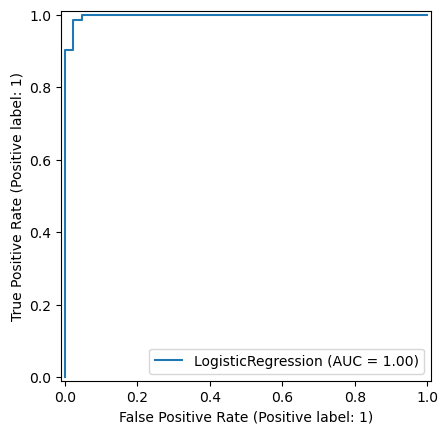

In [109]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(clf, x_test_std, y_test)
plt.show()